# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from package_Engels_Theo_Losseau_Baudouin import Run_LL, Lead_Lag_Discreet_RT, PID_RT, FF_RT, sim_tclabP,PID, IMC_Tuning_SOPDT,bodePID,bodePC,Margin,find_nearest_index

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

# LeadLag

In [2]:
help(Lead_Lag_Discreet_RT)

Help on function Lead_Lag_Discreet_RT in module package_Engels_Theo_Losseau_Baudouin:

Lead_Lag_Discreet_RT(MV, PV, Tlead, Tlag, Ts, Kp=1, method='EBD', PVInit=0)
    The function "Lead_Lag_Discreet_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain, (optional: default value is 1)
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "Lead_Lag_Discreet_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 50.0)

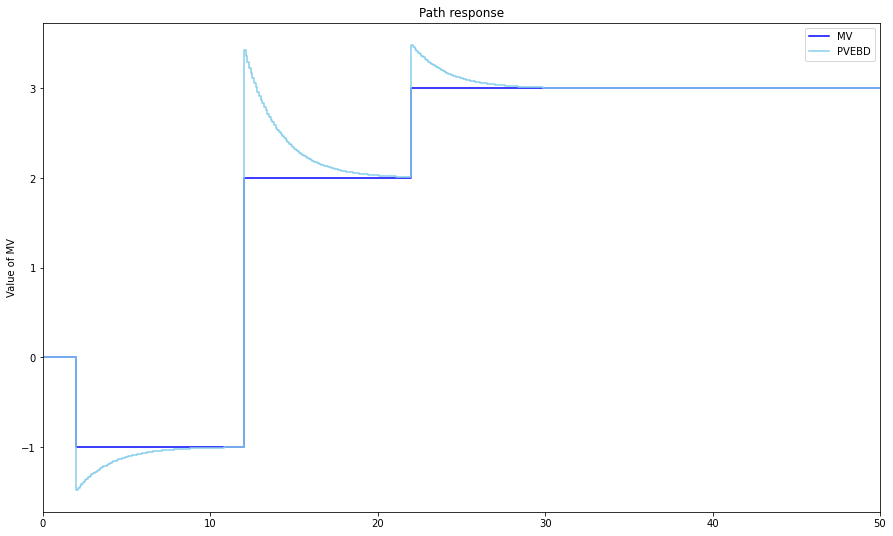

In [3]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 2: -1,12:2,22:3}

Tlead = 3
Tlag = 2

t = []
MV = []
PVEBD = []
PVEFD = []
PVTRAP = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Lead_Lag_Discreet_RT(MV,PVEBD,Tlead,Tlag,Ts)
    # Lead_Lag_Discreet_RT(MV,PVEFD,Tlead,Tlag,Ts,method='EFD')
    # Lead_Lag_Discreet_RT(MV,PVTRAP,Tlead,Tlag,Ts,method='TRAP')
    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PVEBD,'skyblue',label='PVEBD',where='post')
# plt.step(t,PVEFD,'red',label='PVEFD',where='post')
# plt.step(t,PVEFD,'black',label='PVTRAP',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

# Interactive Diplsay of Lead_Lag

In [4]:
help(Run_LL)

Help on function Run_LL in module package_Engels_Theo_Losseau_Baudouin:

Run_LL(Tlead, Tlag, TSim, method)
    The function "Lead_Lag_Discreet_RT" is designed to be used in an interactive widget.
    
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :TSim: Total time of simulation, set small value to zoom and see the difference between methods
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    Uses Lead_Lag_Discreet_RT to display MV and PV with default values for Ts and MV.
    
    
    :MV: input vector used in Lead_Lag_Discreet_RT = {0: 0, 2: -1,12:2,22:3}
    :Ts: sampling period [s] = 0.1



In [5]:
interactive(Run_LL,Tlead=(1,10),Tlag=(1,10),TSim=(5,100),method = ['EBD','EFD','TRAP'])

interactive(children=(IntSlider(value=5, description='Tlead', max=10, min=1), IntSlider(value=5, description='…

# Exemple of difference between method used in Lead_Lag

(0.0, 5.0)

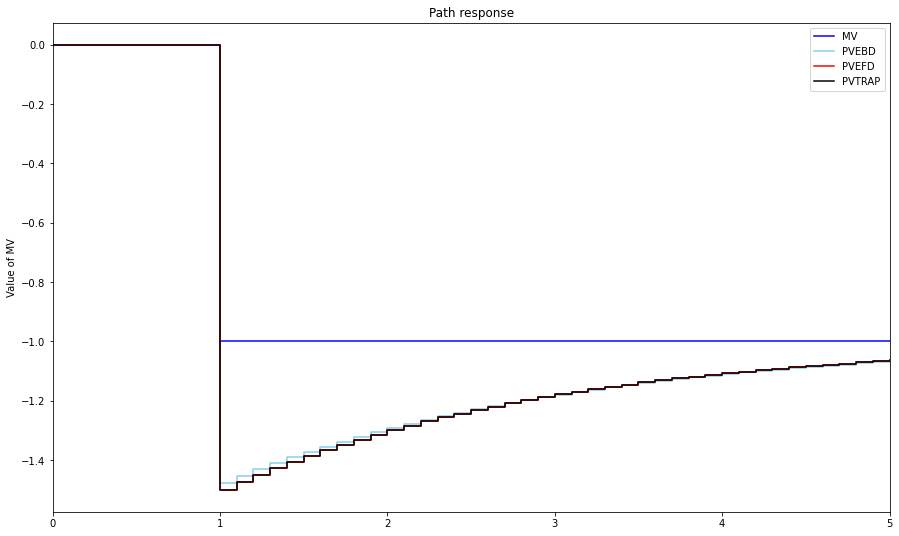

In [6]:
TSim = 5
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 1: -1}

Tlead = 3
Tlag = 2

t = []
MV = []
PVEBD = []
PVEFD = []
PVTRAP = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Lead_Lag_Discreet_RT(MV,PVEBD,Tlead,Tlag,Ts)
    Lead_Lag_Discreet_RT(MV,PVEFD,Tlead,Tlag,Ts,method='EFD')
    Lead_Lag_Discreet_RT(MV,PVTRAP,Tlead,Tlag,Ts,method='TRAP')
    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PVEBD,'skyblue',label='PVEBD',where='post')
plt.step(t,PVEFD,'red',label='PVEFD',where='post')
plt.step(t,PVEFD,'black',label='PVTRAP',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

# PID_RT()

In [7]:
help(PID_RT)

Help on function PID_RT in module package_Engels_Theo_Losseau_Baudouin:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, alpha=0.4, ManFF=False, FF=True, PVInit=0)
    The function "PID_RT" needs to be included in a "for or while loop".
    
    Inputs:
    :SP: SetPoint vector
    :PV: Precess Value vector
    :Man: Manual vector
    :MVMan: Manual value vector
    :MVFF: FeedForward vector (ouput of FF_RT)
    
    Parameters:
    :Kc: Controller gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :Ts: sampling period [s]
    :MVMin: Minimum value for MV (used for saturation and anti wind-up)
    :MVMax: Maxomum value for MV (used for saturation and anti wind-up)
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s]
    :FF: boolean value, activates or deactivates the feedforward, default value is true
    :ManFF: boolean value, activates the feedforward in manual mode, default value is fals

(0.0, 1000.0)

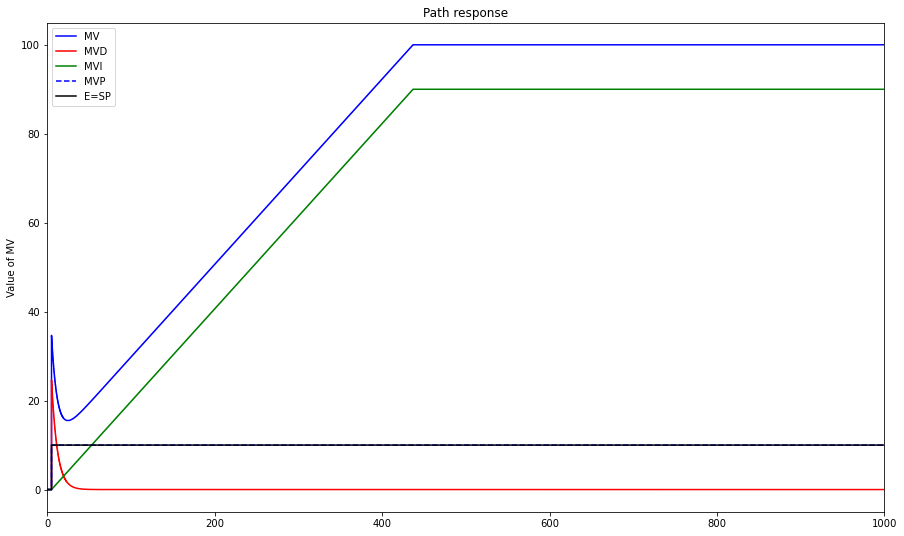

In [8]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
SPPath = {0: 0,5:10}
PVPath = {0:0}


Kc = 1
Ti = 48
Td = 17
satMin = 0
satMax = 100

t = []
MV = []
PV = []
SP = []
MVP = []
MVI = []
MVD = []
E = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    PID_RT(SP,PV,[0],[0],[0],Kc,Ti,Td,Ts,satMin,satMax,MV,MVP,MVI,MVD,E)

    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
plt.step(t,MVD,'red',label='MVD',where='post')
plt.step(t,MVI,'green',label='MVI',where='post')
plt.step(t,MVP,'b--',label='MVP',where='post')
plt.step(t,E,'black',label='E=SP',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

# sim_tclabP

In [9]:
help(sim_tclabP)

Help on function sim_tclabP in module package_Engels_Theo_Losseau_Baudouin:

sim_tclabP(MV, PV, Ts, PVtemp1, PVtemp2, Kp, T1, T2, Theta)
    The function "sim_tclabP" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Ts: sampling period [s]
    :Kp: Process gain
    :T1: First Time constant [s]
    :T2: Second Time constant [s]
    :Theta: Delay time
    
    
    :PV: output vector
    :PVtemp1: Transision vector needs to be empty at start of loop
    :PVtemp2: Transision vector needs to be empty at start of loop
    
    The function "sim_tclabP" appends a value to the output vector "PV".
    The appended value is obtained through 2 first order systems (FO_RT) and a delay (Delay_RT).



(0.0, 1000.0)

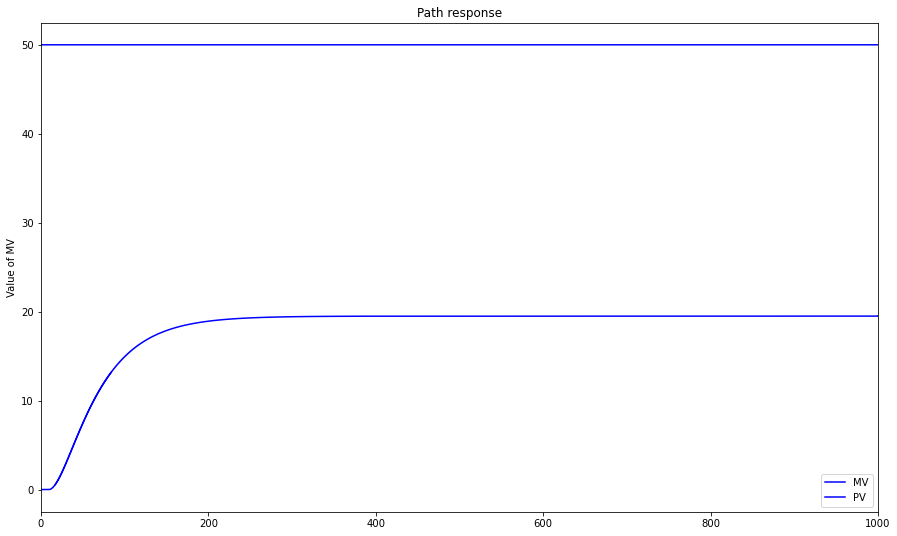

In [10]:
TSim = 1000
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0:50}



Tlead1 = 47.84
# Tlag1 = 245.36
Tlead2 = 17.39
# Tlag2 = 3.13
Theta1 = 9.31
# Theta2 = 0.56
Kp = 0.39
# Kd = 0.63


t = []
MV = []
PV = []
PVtemp1=[]
PVtemp2=[]

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    sim_tclabP(MV,PV,Ts,PVtemp1,PVtemp2,Kp,Tlead1,Tlead2,Theta1)

    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b',label='MV',where='post')
plt.step(t,PV,'b',label='PV',where='post')

plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

# FF_RT

In [11]:
help(FF_RT)

Help on function FF_RT in module package_Engels_Theo_Losseau_Baudouin:

FF_RT(DV, Tlead1, Tlag1, Tlead2, Tlag2, Theta1, Theta2, Kp, Kd, Ts, MVFF, PV1, PV2)
    The function "FF_RT" needs to be included in a "for or while loop".
    
    :DV: input vector
    :Tlead1: First lead time constant [s]
    :Tlag1: First lag time constant [s]
    :Tlead2: Second lead time constant [s]
    :Tlag2: Second lag time constant [s]
    :Theta1: First Process delay
    :Theta2: Seconde Process delay
    :Kp: First process gain
    :Kd: Second process gain
    
    :Ts: sampling period [s]
    :MVFF: output vector
    :PV1: Transision vector needs to be empty at start of loop
    :PV2: Transision vector needs to be empty at start of loop
    
    The function "FF_RT" appends a value to the output vector "MVFF".
    The appended value is obtained through 2 lead_lag (Lead_Lag_Discreet_RT) and a delay (Delay_RT).



(0.0, 100.0)

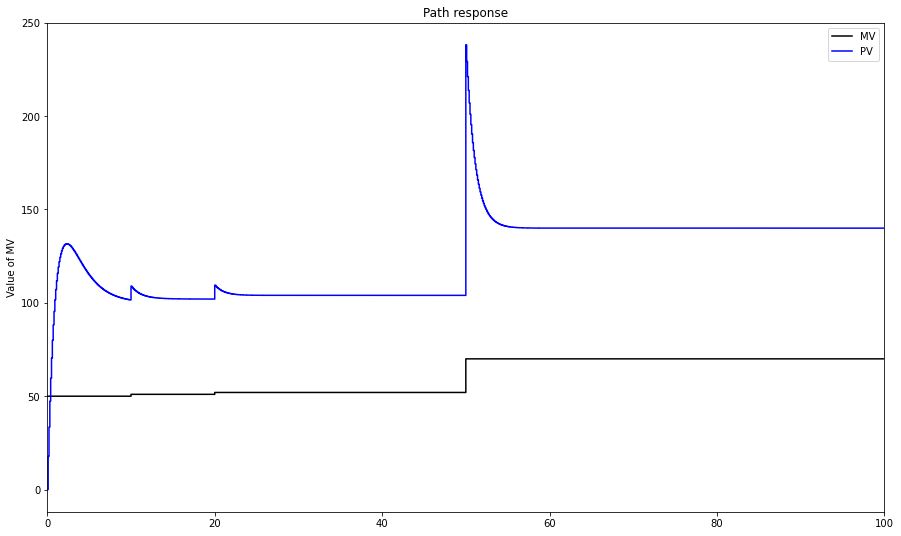

In [12]:
Kp = 1
Kd = 2
Tlead1 = 2
Tlead2 = 4
Tlag1 = 1
Tlag2 = 2
Theta1 = 9
Theta2 = 1
MVFF = []
PV1=[]
PV2 = []
MV = []
t=[]
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1
MVPath = {0:50,10:51,20:52,50:70}

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    FF_RT(MV,Tlead1,Tlag1,Tlead2,Tlag2,Theta1,Theta2,Kp,Kd,Ts,MVFF,PV1,PV2)
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'black',label='MV',where='post')
plt.step(t,MVFF,'b',label='PV',where='post')

plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

# IMC_Tuning_SOPDT

In [13]:
help(IMC_Tuning_SOPDT)

Help on function IMC_Tuning_SOPDT in module package_Engels_Theo_Losseau_Baudouin:

IMC_Tuning_SOPDT(Kp, T1, T2, theta, gamma)
    The function "sim_tclabP" does NOT need to be included in a "for or while loop".
    
    :Kp: Process gain
    :T1: First Time constant [s]
    :T2: Second Time constant [s]
    :Theta: Delay time
    :gamma: Tclp = gamma*T1 Tclp is the desired closed-loop time constant
    
    The function "IMC_Tuning_SOPDT" return a tuple containing values for Kc, Ti and Td obtained from the formuilas given in row I of the IMC table with T3 = 0.
    
    :Kc: Controller gain
    :Ti: Integration time constant
    :Td: Derivative time constant



In [14]:
Kp = 0.395
T1 = 47.84
T2 = 17.39
theta = 9.31
gamma = 0.2

print(IMC_Tuning_SOPDT(Kp,T1,T2,theta,gamma))

(1.3648612141116645, 65.23, 34.78)


# bodePID

In [15]:
help(bodePID)

Help on function bodePID in module package_Engels_Theo_Losseau_Baudouin:

bodePID(C, omega, Show=True)
    :C: Controller as defined by the class "PID".     
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    :Show: boolean value (optional: default value = True). If Show = True, the Bode diagram is shown. Otherwise Cs (C(j omega)) (vector of complex numbers) is returned.
    
    The function "bodePID" generates the Bode diagram of the controller C.
    
    This function is based on the "Bode" function found in package_DBR.py.



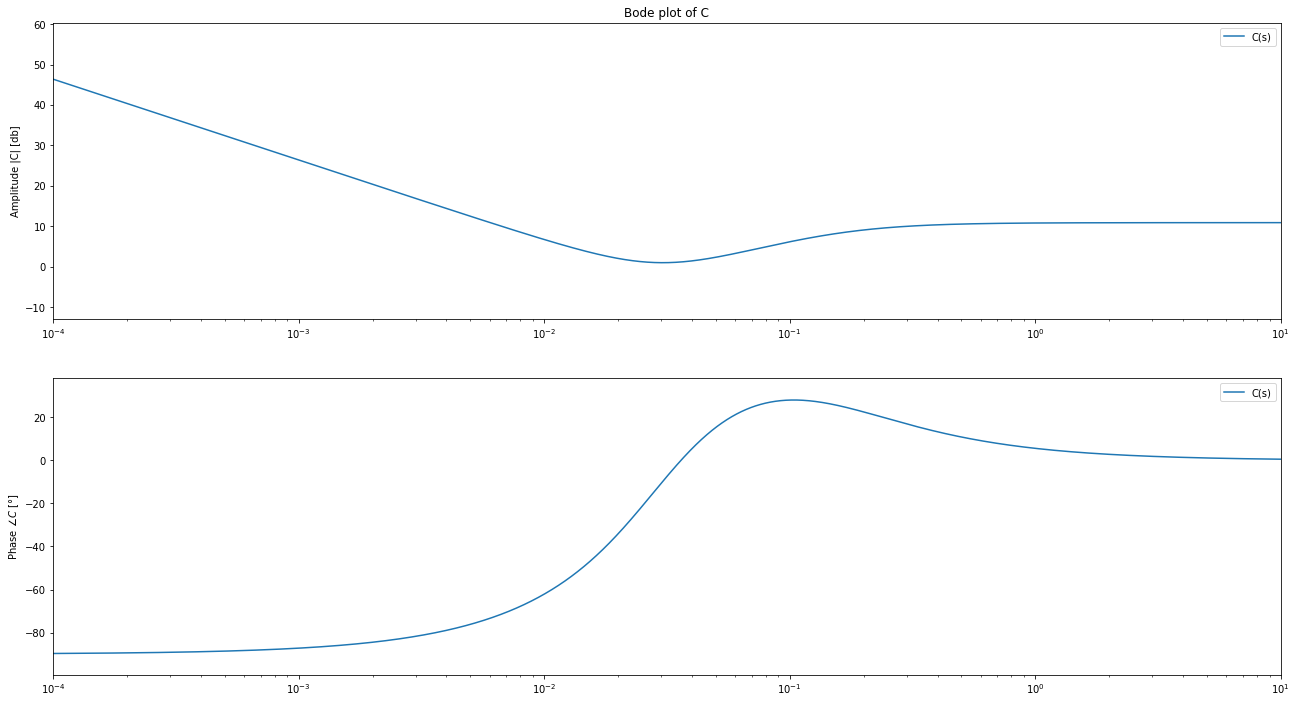

In [16]:
C = PID({})

C.parameters['Kc']=1
C.parameters['Ti']=48
C.parameters['Td']=17
omega = np.logspace(-4, 1, 10000)

bodePID(C,omega)

# bodePC

In [17]:
help(bodePC)

Help on function bodePC in module package_Engels_Theo_Losseau_Baudouin:

bodePC(P, C, omega, Show=True)
    :P: Process as defined by the class "Process"
    :C: Controller as defined by the class "PID".     
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    :Show: boolean value (optional: default value = True). If Show = True, the Bode diagram is shown. Otherwise Ls (L(j omega)) (vector of complex numbers) is returned where L(s) = P(s)*C(s).
    
    The function "bodePID" generates the Bode diagram of the controller C.
    
    This function is based on the "Bode" function found in package_DBR.py.



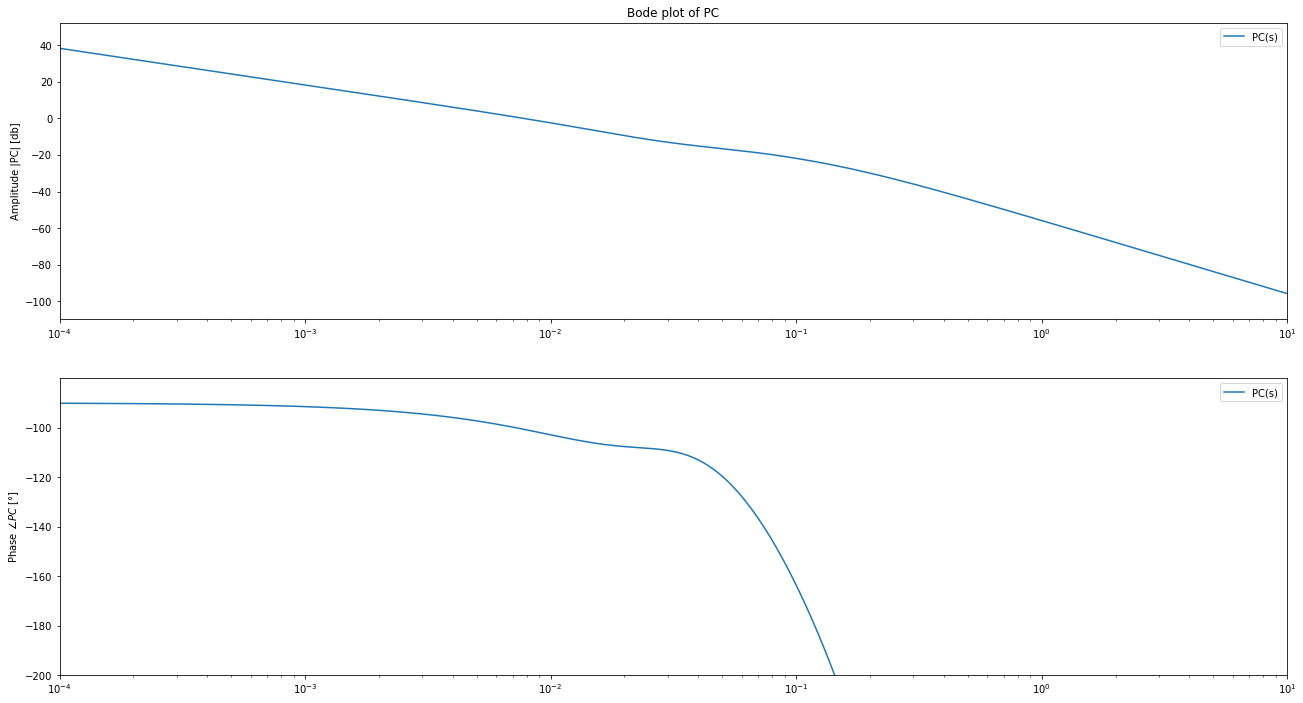

In [18]:
P = Process({})
P.parameters['Kp']=0.39
P.parameters['Tlag1']=47.83
P.parameters['Tlag2']=17.39
P.parameters['theta']=9.31
C = PID({})
C.parameters['Kc']=1
C.parameters['Ti']=48
C.parameters['Td']=17
omega = np.logspace(-4, 1, 10000)

bodePC(P,C,omega)

# find_nearest_index

In [19]:
help(find_nearest_index)

Help on function find_nearest_index in module package_Engels_Theo_Losseau_Baudouin:

find_nearest_index(array, value)
    :array: array in wich we wish to find the value
    :value: value to find in array
    
    Find the index of the value in array closest to value



In [20]:
array = [0,1,1.2,1.4,1.5,3,6]

print(find_nearest_index(array,1.6))

4


# Margin

In [21]:
help(Margin)

Help on function Margin in module package_Engels_Theo_Losseau_Baudouin:

Margin(P, C, omega, Show=True)
    :P: Process as defined by the class "Process"
    :C: Controller as defined by the class "PID".     
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    :Show: boolean value (optional: default value = True). If Show = True, the Bode diagram is shown. Otherwise the values of the margins are returned
    
    The function "Margin" generates the Bode diagram of L(s)=P(s)*C(s) and shows the phase and gain margins.
    
    This function is based on the "Bode" function found in package_DBR.py.



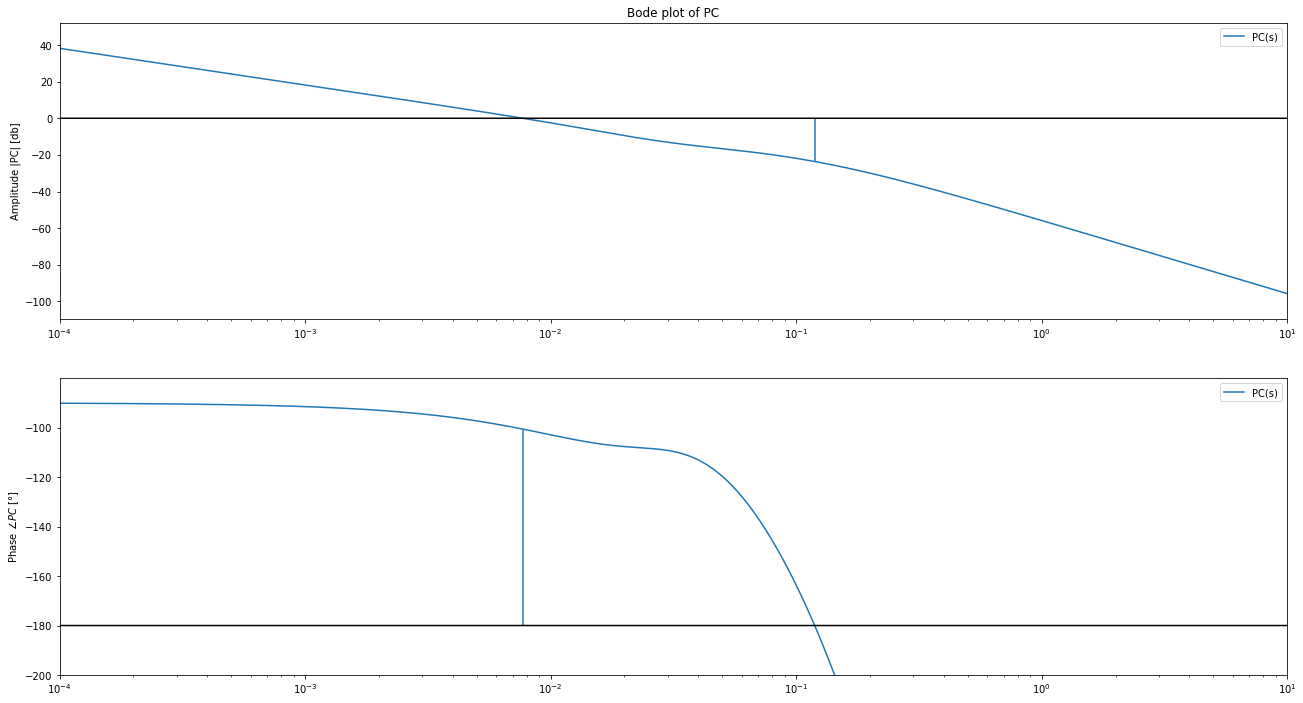

In [22]:
P = Process({})
P.parameters['Kp']=0.39
P.parameters['Tlag1']=47.83
P.parameters['Tlag2']=17.39
P.parameters['theta']=9.31
C = PID({})
C.parameters['Kc']=1
C.parameters['Ti']=48
C.parameters['Td']=17
omega = np.logspace(-4, 1, 10000)



Margin(P,C,omega)